# Neural Network Engine

We are going to explore the following topics in these notebooks:
-Our implementation of the Neural Network and how it works.
-Test it´s functionality with several datasets.
-Discuss the results given by the class.

## Creation of an instance

The source code is in the nn_class.py file.
It can create as many layers and neurons as wanted.

In [11]:
import numpy as np
from neural_network import train, predict
from nn_components.draw_nn import draw_nn
from nn_components.network_layer import FullyConnectedLayer
from nn_components.activations_functions import Relu, Tanh
from nn_components.loss_functions import mse, mse_derivative
#from sklearn.datasets import load_diabetes
#from sklearn.model_selection import train_test_split


#X, y = load_diabetes(return_X_y=True)

#X = np.reshape(X, (442, 10, 1))
#y = np.reshape(y, (442, 1))
#X_train, X_test, y_train, y_test = train_test_split(X, y)


X = np.reshape([[0, 0], [0, 1], [1, 0], [1, 1]], (4, 2, 1))
y = np.reshape([[0], [1], [1], [0]], (4, 1, 1))


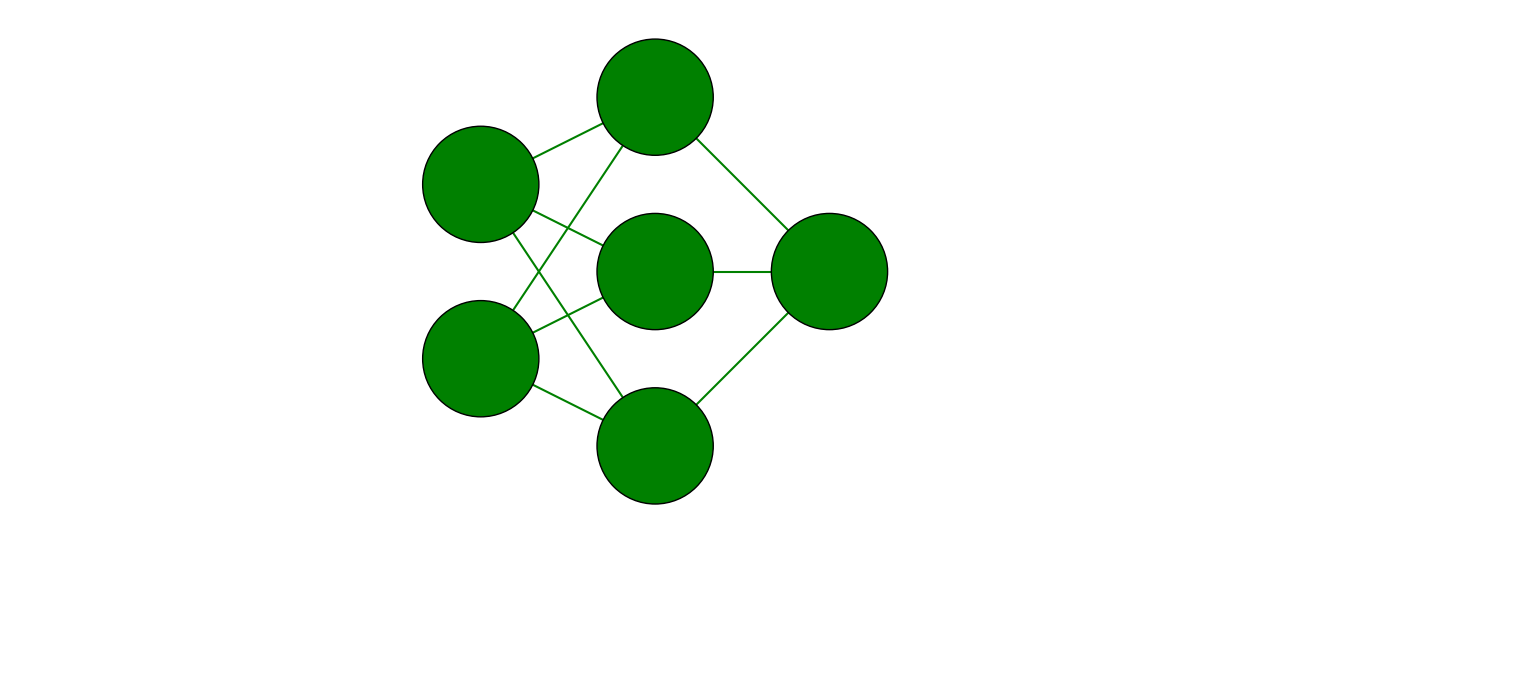

In [12]:
nn = [
    FullyConnectedLayer(2, 3),
    Tanh(),
    FullyConnectedLayer(3, 1),
    Tanh()
]

draw_nn(nn)


In [13]:
train(nn, mse, mse_derivative, X, y, epochs=10000, learning_rate=0.1)

for X, y in zip(X, y):
    output = predict(nn, X)
    print(f'Pred: {output}, Actual: {y}')

Epoch 1 | Loss: 1.2715378177727898
Epoch 11 | Loss: 0.2986727618693005
Epoch 21 | Loss: 0.29543506290743854
Epoch 31 | Loss: 0.292583482882095
Epoch 41 | Loss: 0.29010587009719824
Epoch 51 | Loss: 0.28795012724949076
Epoch 61 | Loss: 0.2860065039192901
Epoch 71 | Loss: 0.2841369622262261
Epoch 81 | Loss: 0.28216166926653474
Epoch 91 | Loss: 0.2798191409929951
Epoch 101 | Loss: 0.2767240903387435
Epoch 111 | Loss: 0.2723581912580722
Epoch 121 | Loss: 0.2661849192813721
Epoch 131 | Loss: 0.25802985502251136
Epoch 141 | Loss: 0.24858743730425498
Epoch 151 | Loss: 0.23920669982448345
Epoch 161 | Loss: 0.230704277371825
Epoch 171 | Loss: 0.22272613336847177
Epoch 181 | Loss: 0.21397620432725545
Epoch 191 | Loss: 0.20196110632526762
Epoch 201 | Loss: 0.18126783466241825
Epoch 211 | Loss: 0.14134179029478433
Epoch 221 | Loss: 0.08283107115368893
Epoch 231 | Loss: 0.040435080774469556
Epoch 241 | Loss: 0.021585777206499943
Epoch 251 | Loss: 0.013354978076425793
Epoch 261 | Loss: 0.009229892565